In [91]:
# --- Data / Web ---
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, ElementClickInterceptedException, NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
import undetected_chromedriver as uc
import time


# --- Data manipulation  (ileri ki data analiz durumları için kütüphaneleri kullanmak adına) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re

# --- Tarayıcıyı başlat ---
driver = uc.Chrome()
driver.get('https://www.sahibinden.com/')
wait = WebDriverWait(driver, 15)

# Sayfa' da çıkan reklam ver çerezlerin kabul edilmesi 

try:
    search_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="searchSuggestionForm"]/button')))
    search_button.click()
    print("🔍 Arama butonuna tıklandı.")
except ElementClickInterceptedException:
    print("🚧 Reklam kaplaması tıklamayı engelliyor, kaldırılıyor...")
    
    try:
        ad_overlay = driver.find_element(By.XPATH, '//div[starts-with(@id, "adform-adbox-")]')
        driver.execute_script("arguments[0].remove();", ad_overlay)
        print("✅ Reklam kaldırıldı.")

        # Tekrar arama butonuna tıkla
        search_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="searchSuggestionForm"]/button')))
        search_button.click()
        print("🔁 Arama tekrar denendi ve başarılı.")
    except NoSuchElementException:
        print("❌ Reklam kaplaması bulunamadı.")


# --- Arama işlemi ---
sahibinden_arama = "istanbul göztepe "

# Arama kutusunu bul ve yaz
search_input = wait.until(EC.presence_of_element_located((By.ID, "searchText")))
search_input.send_keys(sahibinden_arama)

# Arama butonuna tıkla
search_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="searchSuggestionForm"]/button')))
search_button.click()

# Satılık butonuna tıkla
search_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="searchCategoryContainer"]/div/div/ul/li[1]/a/h2')))
search_button.click()

driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="searchResultsSearchForm"]/div[1]/div[3]/div[3]/div[2]/ul/li[2]/a'))))

# Sayfa yüklenmesini bekle
time.sleep(15)

# Veri çekme başlangıcı (Sahibinden.com' dan xpathleri çekerken manuel TR[1] olarak geliyor. hep 1. ilana bakar bütün sayfadaki ilanları çekmez bu sebep ile sadece tr kalmalı)


item_titles = driver.find_elements (By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[2]') 
item_prices = driver.find_elements (By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[5]')
item_locations = driver.find_elements (By.XPATH, '//*[@id="searchResultsTable"]/tbody[*]/tr/td[7]')
item_dates = driver.find_elements (By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[6]')
item_squares = driver.find_elements (By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[3]')
item_rooms = driver.find_elements (By.XPATH, '//*[@id="searchResultsTable"]/tbody/tr[*]/td[4]')


#liste şekline sokma 

title_list = []
price_list = []
location_list = []
date_list = []
square_list = []
room_list = []

# Adlandırdığımız itemleri ekleme ve text olarak görmek 

for i in range(len(item_titles)):
    title_list.append(item_titles[i].text)
    price_list.append(item_prices[i].text)
    location_list.append(item_locations[i].text)
    date_list.append(item_dates[i].text)
    square_list.append(item_squares[i].text)
    room_list.append(item_rooms[i].text)
    
# Son olarak bütün adlandırdığımız, xpathlere eşleştirdiğimiz listelerin bastırılması

print(title_list)
print(price_list)
print(location_list)
print(date_list)
print(square_list)
print(room_list)


🔍 Arama butonuna tıklandı.
['sahibinden/dubl\xadeks/sıfır/içmima\xadr/marmaray+metr\xado/bağdatayürüme', "İNDEX'DEN BAĞDAT CADDESİNE 2.BİNADA 5 YILLIK BOŞ 3+1 ARA KAT", 'GÖZTEPE METRO YAKINI 3 YILLIK 2 KAT OTOPARK BALKON 3+1 DAİRE', 'Göztepe Mahallesinde 3+1 Sıfır Binada 125m2 Satılık Daire', "Bağdat Caddesi'ne 3 dk. Mesafede Kullanışlı Satılık 3+1", "Bağdat Caddesi'ne 3 dk. Mesafede Kullanışlı Satılık 3+1", 'ALTERNATİFSİZ FİYATA..!! FULL YAPILI, BOŞ..', "INDIRDIK..K\xadELEPIR.iKI BALKON BAGDAT'YAKIN 4YIL KAP+A.O.P KOMBİ", 'GÖZTEPE TÜTÜNCÜ MEHMET EFENDİ PROJEDEN 3+1', 'DENİZ MANZARALI..GÖZTEPE PARKINDA,3+1\xadSAHİLDE.145 M2 BALKON+DEPO', "EMLAKBURDA OFİSİNDEN BAĞDAT'A 15. BİNA TÜTÜNCÜ ÜZERİ 3+1 / 145M2", 'EMLAKBURDA TÜTÜNCÜ MEHMET EFENDİ CADDESİNDE ÖN CEPHE 3+1 150M2', "Kadıköy Göztepe'de Satılık 3+1 Daire 128 m2 (Arsa Payı 53.13 m2)", 'Göztepe Mahallesinde 3+1 Butik Sitede Satılık Bakımlı Daire', 'TANZİMAT SOKAKTA,BAĞDAT CADDESİNE 5 dk,140 m2, 2013 YAPIMI,3+1', "OPTİMA'DAN GÖZTEPEDE B

In [92]:
#Verileri pandas ile düzenleme > 1

Sahibinden_df = pd.DataFrame(zip(title_list, price_list, location_list, date_list, square_list, room_list),columns = ['Title', 'Price', 'Location', 'Date', 'Square', 'Room'])




In [ ]:
# 1 # Data'nın düzenini ve değerlerini anlamak 

In [85]:
Sahibinden_df.head(51)

,Title,Price,Location,Date,Square,Room
0,"( TATU ) GÖZTEPE M.CADDE ÜSTÜNDE 3+1, 140M KOM...",55.000 TL,Kadıköy\nGöztepe,14 Temmuz\n2025,140,3+1
1,sahibinden/dubl­eks/sıfır/içmima­r/marmaray+me...,29.800.000 TL,Kadıköy\nGöztepe,12 Temmuz\n2025,169,3+2
2,İNDEX'DEN BAĞDAT CADDESİNE 2.BİNADA 5 YILLIK B...,27.950.000 TL,Kadıköy\nGöztepe,10 Temmuz\n2025,140,3+1
3,GÖZTEPE METRO YAKINI 3 YILLIK 2 KAT OTOPARK BA...,14.000.000 TL,Kadıköy\nMerdivenköy,10 Temmuz\n2025,125,3+1
4,Göztepe Mahallesinde 3+1 Sıfır Binada 125m2 Sa...,5.525.000 TL,Bağcılar,09 Temmuz\n2025,125,3+1
5,Bağdat Caddesi'ne 3 dk. Mesafede Kullanışlı Sa...,22.250.000 TL,Kadıköy\nGöztepe,09 Temmuz\n2025,130,3+1
6,Bağdat Caddesi'ne 3 dk. Mesafede Kullanışlı Sa...,22.250.000 TL,Kadıköy\nGöztepe,09 Temmuz\n2025,130,3+1
7,"ALTERNATİFSİZ FİYATA..!! FULL YAPILI, BOŞ..",10.950.000 TL,Kadıköy\nGöztepe,08 Temmuz\n2025,100,2+1
8,INDIRDIK..K­ELEPIR.iKI BALKON BAGDAT'YAKIN 4YI...,18.990.000 TL,Kadıköy\nGöztepe,07 Temmuz\n2025,150,3+1
9,Göztepe Yeni Eşyalı 2+1 Kiralık (925),68.300 TL,Kadıköy\nGöztepe,03 Temmuz\n2025,66,2+1


In [99]:
print(len(Sahibinden_df.columns))

6


In [97]:
print(len(Sahibinden_df)) #Rows Yazmaya gerek yok.

20


In [101]:
print(Sahibinden_df.isnull().sum())

Title       0
Price       0
Location    0
Date        0
Square      0
Room        0
dtype: int64


In [169]:
Sahibinden_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     20 non-null     object
 1   Price     20 non-null     int64 
 2   Location  20 non-null     object
 3   Date      20 non-null     object
 4   Square    20 non-null     int64 
 5   Room      20 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [171]:
# 2 # Data'nın düzenlenmesi ve sayısal değerlerini doğruluğunu içeriğini kontrol ve analiz etmek.

In [173]:

### TL, boşluk ve nokta karakterlerini temizle

Sahibinden_df['Price'] = (
    Sahibinden_df['Price']
    .astype(str)                               # Her ihtimale karşı stringe çevir
    .str.replace('TL', '', regex=False)        # 'TL' yazısını kaldır
    .str.replace('.', '', regex=False)         # Noktaları kaldır
    .str.replace(r'\s+', '', regex=True)       # Boşluk karakterlerini temizle
)

# Sayıya çevir

Sahibinden_df['Price'] = pd.to_numeric(Sahibinden_df['Price'], errors='coerce')


In [175]:
print(Sahibinden_df[Sahibinden_df['Price'].isna()])       #Sahibinden sayfasında 3. satıra reklam denk geldiği için boş gelmektedir.


Empty DataFrame
Columns: [Title, Price, Location, Date, Square, Room]
Index: []


In [177]:
Sahibinden_df = Sahibinden_df.dropna(subset=['Price'])    #Silme işlemi

In [179]:
print(Sahibinden_df[Sahibinden_df['Price'].isna()]) # Kontrol

Empty DataFrame
Columns: [Title, Price, Location, Date, Square, Room]
Index: []


In [181]:
mean_price = Sahibinden_df['Price'].mean()
median_price = Sahibinden_df['Price'].median()
min_price = Sahibinden_df['Price'].min()
max_price = Sahibinden_df['Price'].max()

In [183]:
print(mean_price)
print(median_price)
print(min_price)
print(max_price)

19880750.0
20470000.0
5525000
35000000


In [185]:
print(f"Ortalama Fiyat: {mean_price:,.0f} TL")
print(f"Medyan Fiyat: {median_price:,.0f} TL")
print(f"Minimum Fiyat: {min_price:,.0f} TL")
print(f"Maksimum Fiyat: {max_price:,.0f} TL")

Ortalama Fiyat: 19,880,750 TL
Medyan Fiyat: 20,470,000 TL
Minimum Fiyat: 5,525,000 TL
Maksimum Fiyat: 35,000,000 TL


In [187]:
# En yüksek evin hangi satıra olduğunu merak ettim

Sahibinden_df.loc[Sahibinden_df['Price'].idxmax()] 

Title       DENİZ MANZARALI..GÖZTEPE PARKINDA,3+1­SAHİLDE....
Price                                                35000000
Location                                 Kadıköy\nCaddebostan
Date                                          01 Temmuz\n2025
Square                                                    145
Room                                                      3+1
Name: 9, dtype: object

In [189]:
# Göztepe' de bu fiyata nasıl ev oluyor diye merak edip arattım. Bağcılar Göztepede olduğunu gördük.

Sahibinden_df.loc[Sahibinden_df['Price'].idxmin()] 



Title       Göztepe Mahallesinde 3+1 Sıfır Binada 125m2 Sa...
Price                                                 5525000
Location                                             Bağcılar
Date                                          09 Temmuz\n2025
Square                                                    125
Room                                                      3+1
Name: 3, dtype: object

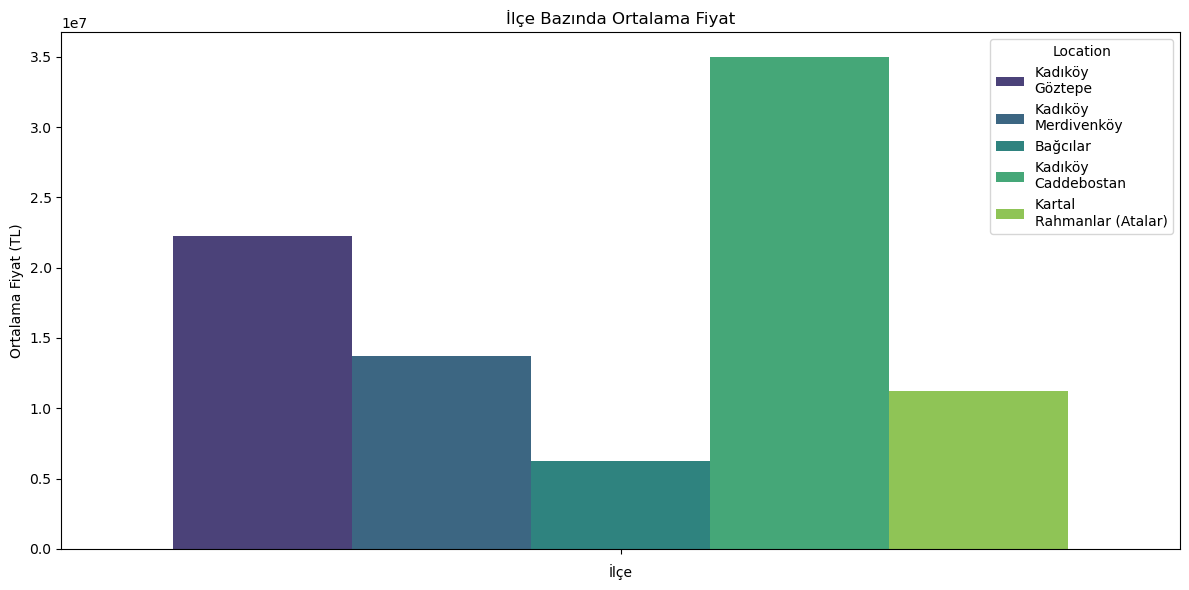

In [191]:
#Grafik olarak Görselleştirme

plt.figure(figsize=(12, 6))
sns.barplot(data=Sahibinden_df, hue="Location", y="Price", estimator=pd.Series.mean, errorbar=None, palette="viridis")
plt.title("İlçe Bazında Ortalama Fiyat")
plt.xticks(rotation=45)
plt.ylabel("Ortalama Fiyat (TL)")
plt.xlabel("İlçe")
plt.tight_layout()
plt.show()

In [193]:
#Datayı görselleştirebilmek adına fiyatı str çevirmek

Sahibinden_df['Price'] = Sahibinden_df['Price'].astype(str)



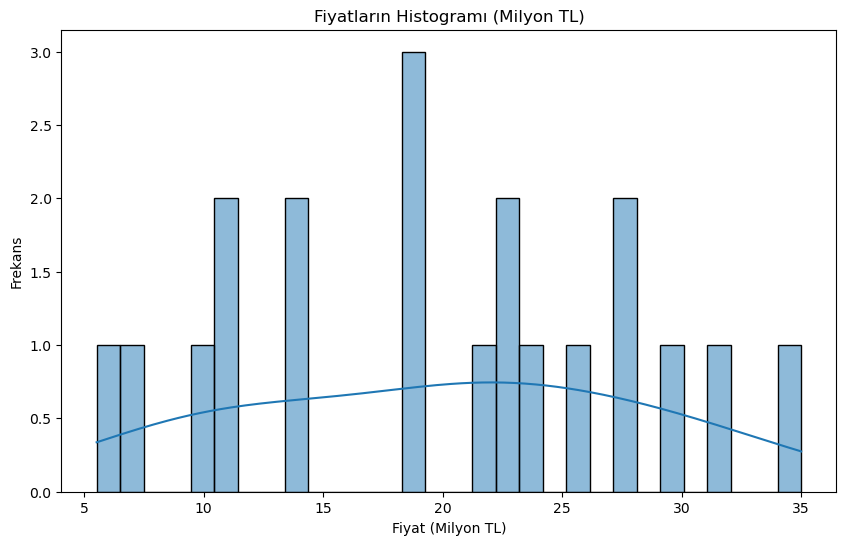

In [239]:
#Histogram şeklinde görselleştirmek

plt.figure(figsize=(10,6))
sns.histplot(Sahibinden_df['Price_million'], bins=30, kde=True)
plt.title('Fiyatların Histogramı (Milyon TL)')
plt.xlabel('Fiyat (Milyon TL)')
plt.ylabel('Frekans')
plt.show()

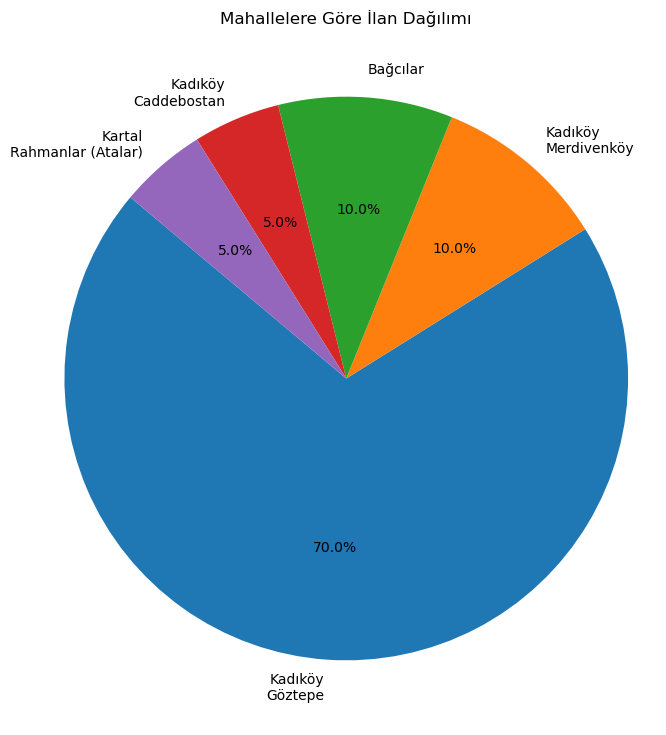

In [253]:
#Pie Chart olarak görselleştirme

mahalle_sayilari = Sahibinden_df['Location'].value_counts()

plt.figure(figsize=(8,9))
plt.pie(mahalle_sayilari, labels=mahalle_sayilari.index, autopct='%1.1f%%', startangle=140)
plt.title('Mahallelere Göre İlan Dağılımı')
plt.axis('equal')  # Daire şeklinde olsun
plt.show()